In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori

In [54]:
df = pd.read_csv('Amazinum\Data\Lesson15\Groceries_dataset.csv')
df.head ()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [55]:
len(df)

38765

(array([1.008e+04, 2.698e+03, 1.390e+03, 3.440e+02, 1.750e+02, 8.000e+01,
        1.450e+02, 5.000e+01, 0.000e+00, 1.000e+00]),
 array([ 2. ,  2.9,  3.8,  4.7,  5.6,  6.5,  7.4,  8.3,  9.2, 10.1, 11. ]),
 <BarContainer object of 10 artists>)

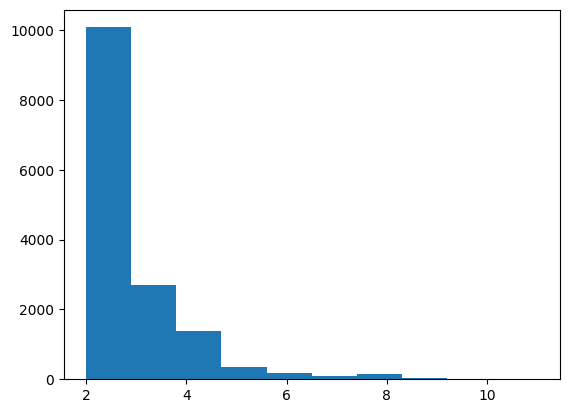

In [56]:
dist = [len(g) for k, g in df.groupby(['Member_number', 'Date'])]
plt.hist(dist)

In [57]:
transactions = df.groupby(['Member_number', 'Date'])


In [58]:
list_transactions = [i[1]['itemDescription'].tolist() for i in list(transactions)]
list_transactions

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['other vegetables', 'hygiene articles'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['root vegetables', 'whole milk'

In [59]:
rules = apriori(list_transactions, min_support = 0.001, min_confidence = 0.05, min_lift = 1.2, max_length = 2)
results = list(rules)

In [60]:
def print_rules(rules):
    for rule in rules:
        print ('rule.items=', list(rule.items))
        print ('rule.support=',rule.support)

        for os in rule.ordered_statistics:
            print ('\titems_base=', list(os.items_base))
            print ('\tlifted_item =', list(os.items_add))
            print ('\tlift=', os.lift)
            print ('\tconfidence (i.e. cond prob {} if {})='.format(list(os.items_add), list(os.items_base)), os.confidence)
            print ('\n')
        

In [61]:
 print_rules(results)

rule.items= ['beverages', 'sausage']
rule.support= 0.0015371249081066632
	items_base= ['beverages']
	lifted_item = ['sausage']
	lift= 1.5367636551995143
	confidence (i.e. cond prob ['sausage'] if ['beverages'])= 0.09274193548387098


rule.items= ['sausage', 'bottled beer']
rule.support= 0.003341575887188398
	items_base= ['bottled beer']
	lifted_item = ['sausage']
	lift= 1.2220000849348451
	confidence (i.e. cond prob ['sausage'] if ['bottled beer'])= 0.07374631268436578


	items_base= ['sausage']
	lifted_item = ['bottled beer']
	lift= 1.2220000849348451
	confidence (i.e. cond prob ['bottled beer'] if ['sausage'])= 0.05537098560354374


rule.items= ['sugar', 'bottled water']
rule.support= 0.0014702933903628951
	items_base= ['sugar']
	lifted_item = ['bottled water']
	lift= 1.368074141800349
	confidence (i.e. cond prob ['bottled water'] if ['sugar'])= 0.0830188679245283


rule.items= ['brown bread', 'canned beer']
rule.support= 0.0024059346387756467
	items_base= ['brown bread']
	lifted_ite

In [62]:
df = pd.DataFrame(columns=('Base_item','Lifted_item','Support','Confidence','Lift'))

Support =[]
Confidence = []
Lift = []
Base_item = []
Lifted_item=[]

for RelationRecord in results:
    for ordered_stat in RelationRecord.ordered_statistics:
        Support.append(RelationRecord.support)
        Base_item.append(ordered_stat.items_base)
        Lifted_item.append(ordered_stat.items_add)
        Confidence.append(ordered_stat.confidence)
        Lift.append(ordered_stat.lift)
                                  
df['Base_item'] = list(map(set, Base_item))
df['Lifted_item'] = list(map(set, Consequent))
df['Support'] = Support
df['Confidence'] = Confidence
df['Lift']= Lift

In [65]:
df.sort_values(by ='Support', ascending = False, inplace = True)

In [66]:
df.head(10)

,Base_item,Lifted_item,Support,Confidence,Lift
2,{sausage},{bottled beer},0.003342,0.055371,1.222000
1,{bottled beer},{sausage},0.003342,0.073746,1.222000
11,{curd},{sausage},0.002941,0.087302,1.446615
4,{brown bread},{canned beer},0.002406,0.063943,1.362937
5,{canned beer},{brown bread},0.002406,0.051282,1.362937
15,{frozen vegetables},{sausage},0.002072,0.073986,1.225966
20,{oil},{soda},0.001804,0.121076,1.246844
19,{napkins},{pastry},0.001738,0.078550,1.518529
0,{beverages},{sausage},0.001537,0.092742,1.536764
7,{white bread},{canned beer},0.001537,0.064067,1.365573
